# **Project Title: Data-Driven Movie Studio Profitability Analysis**

# ****Author: GROUP 7****


## **Step 1: Business Understanding**

The entertainment industry is highly competitive, with film studios facing significant financial risks due to high production costs and unpredictable audience preferences. For a new movie studio entering the market, data-driven decision-making is critical to maximize profitability, minimize risks, and establish a sustainable business model. This project aims to analyze historical film performance data to identify key success factors, optimize production strategies, and recommend actionable insights for the studio’s initial film slate.

## ****Challenges****

Key challenges include:

- Understanding overall performance of the film industry overtime.
- Identifying which genres and film types that yield the highest returns
- Determining optimal budget ranges for different categories of films
- Understanding how reviews correlate with film success
- Understanding the relationship between production factors and financial success

## ****Proposed Solution****

Analyze historical box office data to identify information and patterns like genres, budgets, reviews, franchises in successful films. Then provide actionable recommendations to guide the company on the things to prioritize and the studio content strategy to adopt.

## ****Conclusion****

By leveraging data analysis, the company can identify successful and failure patterns inorder to adopt the right strategy, mitigate risks and align its film production with market demand.

## ****Problem Statement****

The company aims to establish a new movie studio to capitalize on the growing demand for original video content. However, due to lack of experience in movie production, they need data-driven insights to make strategic decisions about film production that will maximize profitability in a competitive entertainment market. 

## ****Objectives****

1. To analyze historical box office data to identify trends over the years
2. To determine the relationship between production budget and revenue
3. To analyze audience review
4. To provide actionable recommendations on best film production strategies


## **Step 2: Data Undertanding**

### ****Data Source****
The folder zippedData contains historical box office data scrapped from https://www.boxofficemojo.com/, https://www.imdb.com/, https://www.rottentomatoes.com/, https://www.themoviedb.org/, https://www.the-numbers.com/ that will be used for this analysis, detailing all relevant information about film industry, including the movie genres, their budget, revenue, producers, release date and reviews. For this project we will concentrate on the following:

| Source | Description |
|--------|-------------|
| Box Office Mojo | Historical box office performance |
| The Numbers | Production budgets and financials |
| IMDb | Talent and film metadata |

### **column description**
Relevant columns:

1. **genres**
- Type: Categorical
- Description: The primary category/categories of the film (e.g., Action, Comedy, Drama, Animation).

2. **production_budget**
- Type: Numerical
- Description: Total production cost of the film in USD.

3. **domestic_gross/worldwide_gross**
- Type: Numerical
- Description: Total box office earnings in USD.

4. **release_date**
- Type: Categorical
- Description: Month the film was released

5. **runtime_minutes**
- Type: Numerical
- Description: Duration of the film in minutes.

6. **averagerating**
- Type: Numerical
- Description: Audience or critic aggregate score

7. **num_votes**
- Type: Numerical
- Description: The number of votes per genre rating

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# loading the datasets
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
rt_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", 
                      sep='\t')
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", 
                         sep='\t', 
                         encoding='latin1')
movie_DB = pd.read_csv("zippedData/tmdb.movies.csv.gz")
numbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

# import file to extract zip file
import zipfile
# import file to create a temporary extracted file
import tempfile
import os 

# Extract the .db file from the ZIP
with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
    with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
        tmp_file.write(zip_ref.read("im.db"))

# # Connect to the extracted database
conn = sqlite3.connect(tmp_file.name)  # Path to extracted file

# Run your query
q = """
SELECT *
FROM movie_basics
JOIN movie_ratings USING (movie_id)
"""
imdb = pd.read_sql(q, conn)

# Close connection
conn.close()

In [3]:
# Display the first 5 rows
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# get info summary of the dataset
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Box office mojo dataset has 3387 rows. From this, it can be seen that the columns studio, domestic_gross and foreign_gross have missing values.

In [5]:
# Display the first 5 rows
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [6]:
# get info summary of the dataset
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


From the movie_basics and movie_ratings tables form IMDB sqlite file extracted, the final joined contains 73856 rows. It can be seen that columns runtime_minutes and genres contains missing values

In [7]:
# Display the first 5 rows
numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# get info summary of the dataset
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the numbers table, it can be seen that the table has 5782 and the columns have no missing values

## Step 3: Data Preparations
### data cleaning


In [9]:
# checking for duplicates
bom.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [10]:
imdb.duplicated().value_counts()

False    73856
Name: count, dtype: int64

In [11]:
numbers.duplicated().value_counts()

False    5782
Name: count, dtype: int64

From the above analysis we can see that the tables have no duplicated values

In [12]:
# check missing values for BOM table
bom.isna().sum() 

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [13]:
# Create a fuction that replaces missing values with placeholders
def null_filler(df):
    for col in df.columns:
        if str(df[col].dtype) == "object":
           df[col].fillna("Unknown", inplace=True)
        else:
           df[col].fillna(0, inplace=True)
    
# call function for our dataframes
null_filler(bom)
bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [14]:
# check missing values of imdb
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [15]:
# call our fuction to replace missing value
null_filler(imdb)
imdb.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

The above codes replaces the missing values with place holders, unknown for categorical and  zero for numerical columns. The reason for this is to maintain the original completness of the dataset without dropping valuable records.

In [16]:
# convert release_date to datetime
numbers["release_date"] = pd.to_datetime(numbers["release_date"])
numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
# Create a function renames columns
def column_editor(df, old_name, new_name):
    rename = df.rename(columns={old_name:new_name}, inplace=True)
    return rename

# call the fuction and edit
column_editor(imdb, "primary_title", "title")
column_editor(numbers, "movie", "title")


In [18]:
# merge all the dataframes
merge1 = pd.merge(imdb, numbers, on='title', how='inner')
merge_df = pd.merge(merge1,bom, on='title', how='inner')


In [19]:
# crate a list of columns to drop
columns = ["original_title", "start_year", "id", "domestic_gross_y", "foreign_gross"]
# pass the list in the .drop method to drop the columns
merge_df = merge_df.drop(columns=columns)

In [20]:
# create a standardized column names
column_editor(merge_df, "domestic_gross_x","domestic_gross")
column_editor(merge_df, "averagerating","average_rating")
column_editor(merge_df, "numvotes","num_votes")

In [21]:
# create a function that converts object to integer
def converter(df,column_name):
    # Remove $ and , before converting
    df[column_name]=df[column_name].replace("[\\$,]",
                                            "",
                                            regex=True).astype(int)
    return 

# create a list of columns to convert 
column = ["domestic_gross","worldwide_gross","production_budget"]
converter(merge_df,column)


In [22]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1413 non-null   object        
 1   title              1413 non-null   object        
 2   runtime_minutes    1413 non-null   float64       
 3   genres             1413 non-null   object        
 4   average_rating     1413 non-null   float64       
 5   num_votes          1413 non-null   int64         
 6   release_date       1413 non-null   datetime64[ns]
 7   production_budget  1413 non-null   int32         
 8   domestic_gross     1413 non-null   int32         
 9   worldwide_gross    1413 non-null   int32         
 10  studio             1413 non-null   object        
 11  year               1413 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 116.0+ KB


In [23]:
# Split genres and explode the DataFrame so each row has one genre

# Split genre string into list
merge_df['genres'] = merge_df['genres'].str.split(',')

# One row per genre per movie
merge_df = merge_df.explode('genres')

# Clean whitespace
merge_df['genres'] = (merge_df['genres']
                      .apply(lambda x: x.strip() 
                             if isinstance(x, str) 
                             else x))

# merge_df.info()

## Data analysis
### Objective1: Historical box office trend over the years

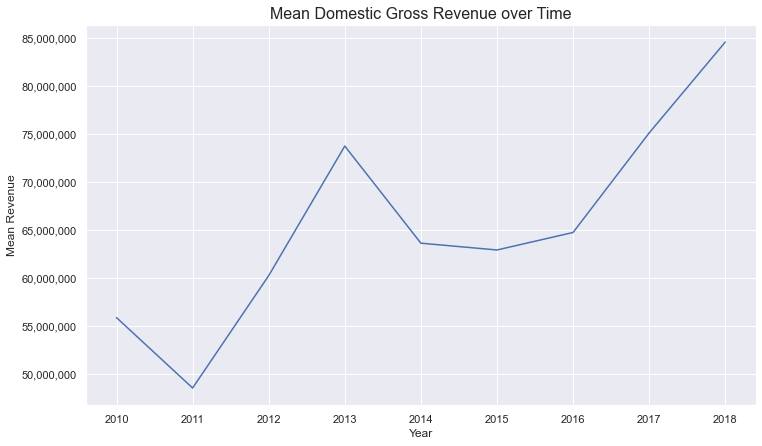

In [41]:
# mean domestic gross over the years 
mean_domestic_gross= (merge_df.groupby("year")["domestic_gross"]
                      .agg(["count","mean"])
                      .sort_values("mean", ascending=False))

# plot year vs mean domestic gross
import matplotlib.ticker as ticker

# set the style and size of the plot
sns.set_style("darkgrid")
sns.set_theme(rc={"figure.figsize":(12,7)})

# Plot mean domestic gross over the years
sns.lineplot(data= mean_domestic_gross,
             x="year",
             y="mean"
            #  errorbar=None # removes the confidence interval
)
# Format the y-axis to include commas and dollar signs
plt.gca().yaxis.set_major_formatter(
    ticker.StrMethodFormatter("{x:,.0f}"))

# Add titles and labels
plt.title("Mean Domestic Gross Revenue over Time", 
          fontsize=16)
plt.xlabel("Year", 
           fontsize=12)
plt.ylabel("Mean Revenue", 
           fontsize=12)

# save image of the plot 
plt.savefig('images/historical-revenue-trend.png', bbox_inches='tight', dpi=300)


From this illustration,it is evident that there was a decline in mean domestic gross from 2010 to 2011,then a steady rise to 2013.It plateaued for a year then steadily dropped for 2years upto 2016.It then peaked upto 2018. In conclusion,its evident that domestically,the mean gross revenue ranges between 40M $ to 80M $

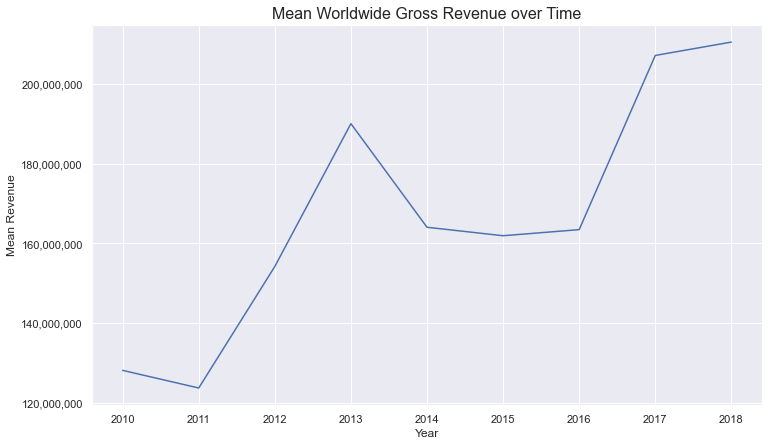

In [25]:
# Mean worldwide gross over the years
mean_worldwide_gross=(merge_df.groupby("year")["worldwide_gross"]
                      .agg(["count","mean"])
                      .sort_values("mean", ascending=False))

# set the style and size of the plot
sns.set_style("darkgrid")
sns.set_theme(rc={"figure.figsize":(12,7)})

# Plot mean domestic gross over the years
sns.lineplot(data= mean_worldwide_gross,
             x="year",
             y="mean"
            #  errorbar=None # removes the confidence interval
)
# Format the y-axis to include commas and dollar signs
plt.gca().yaxis.set_major_formatter(
    ticker.StrMethodFormatter("{x:,.0f}"))

# Add titles and labels
plt.title("Mean Worldwide Gross Revenue over Time", 
          fontsize=16)
plt.xlabel("Year", 
           fontsize=12)
plt.ylabel("Mean Revenue", 
           fontsize=12)

# Show the plot
plt.show()

From the above illustration,It is evident that  mean worlwide gross revenue plateaued for a year, then steadily rose up to 2013,dropped for a year, plateaued for another 2years then steadily peaked.In conclusion, The mean worldwide gross revenue ranges between 100M $ upto 200M $

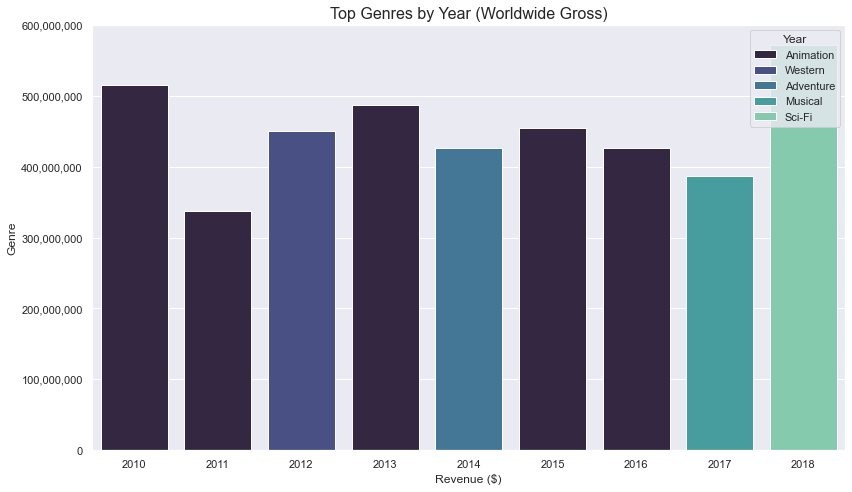

In [26]:
# Top genres yearly by worldwide gross revenue
top_genres_yearly =(merge_df.groupby(["year","genres"])
                    ["worldwide_gross"]
                    .agg(["count","mean"])
                    .sort_values(['year', "mean"], 
                                 ascending=[True, False])
                    .groupby("year").head(1)).reset_index()

# Plot the top genres
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_genres_yearly,
    x='year',
    y='mean',
    hue='genres',
    palette='mako'
    # orient='h'
)

# Add title and axis labels
plt.title('Top Genres by Year (Worldwide Gross)', 
          fontsize=16)
plt.xlabel('Revenue ($)', 
           fontsize=12)
plt.ylabel('Genre', 
           fontsize=12)
plt.legend(title='Year', 
           loc='upper right')

# Format the x-axis to output full values
plt.gca().yaxis.set_major_formatter(
    ticker.StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()


The visualization above shows the trend of the best performing film over the years based on their worldwide gross revenue. The best performing of them was Sci-Fi in 2018

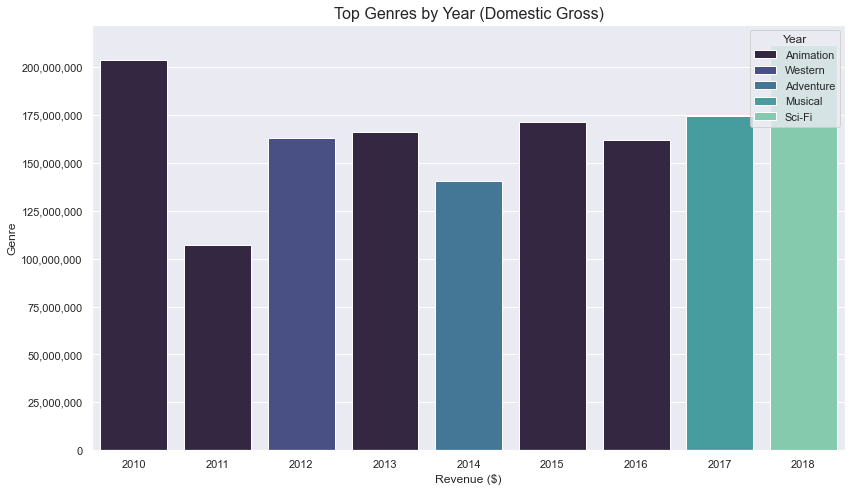

In [27]:
# Top genres yearly by domestic gross revenue
top_genres_yearly2= (merge_df.groupby(["year","genres"])
                       ["domestic_gross"]
                      .agg(["count","mean"])
                      .sort_values(['year', "mean"], 
                                   ascending=[True, False])
                      .groupby("year").head(1).reset_index()
                      )

# Plot the top genres
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_genres_yearly2,
    x='year',
    y='mean',
    hue='genres',
    palette='mako'
    # orient='h'
)

# Add title and axis labels
plt.title('Top Genres by Year (Domestic Gross)', 
          fontsize=16)
plt.xlabel('Revenue ($)', 
           fontsize=12)
plt.ylabel('Genre', 
           fontsize=12)
plt.legend(title='Year',  
           loc='upper right')

# Format the x-axis to output full values
plt.gca().yaxis.set_major_formatter(
    ticker.StrMethodFormatter("{x:,.0f}")
    )

plt.tight_layout()
plt.show()


The visualization above shows the trend of the best performing film over the years based on their domestic gross revenue. The best performing of them was Animations as it topped in 5 of the 9 years

### Objective 2: Relationship between budget and revenue

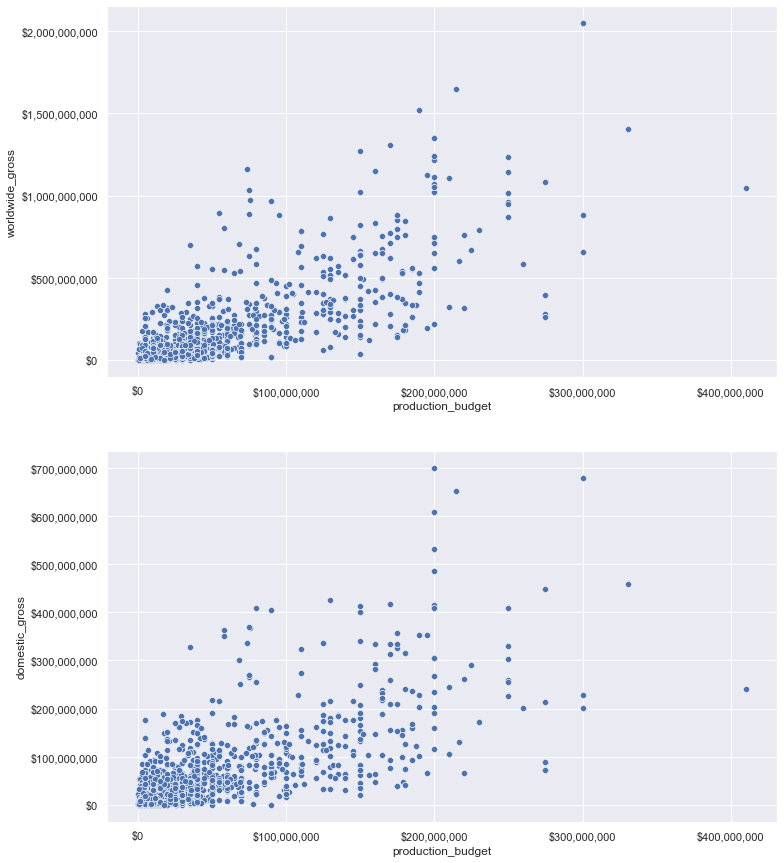

In [28]:
# Formulate hypothesis
H0 = "There is no relationship between production budget and revenue"
H1 = "There is a significant relationship between production budget and revenue"


# plot to scatterplot to see the relationship
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,15))


# plot budget v worldwide
sns.scatterplot(
data=merge_df,
x='production_budget',
y='worldwide_gross',
ax=ax1
)

# Format the y-axis to output full values
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

# plot budget v domestic
sns.scatterplot(
data=merge_df,
x='production_budget',
y='domestic_gross',
ax=ax2
)

# Format the y-axis to output full values
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))




From the above illustrastions, it is evident that they form a cone shape, that is, wider spread at higher values. This indicates heteroscedasticity which mean variance increases with budget. This creates a biaseness for any statistical test of on data. To fix these lets work with return on investment(ROI).

In [29]:
# create columns for roi
merge_df['roi_domestic'] = merge_df['domestic_gross'] / merge_df['production_budget']
merge_df['roi_worldwide'] = merge_df['worldwide_gross'] / merge_df['production_budget']

# Create a function for testing hypothesis
def hypothesis_testing(x, y):

    # import library
    import scipy.stats as stats

    # calculate pearson correlation
    corr, p_value = stats.pearsonr(x, y)
    result = print(f"Correlation: {corr:.4f}, p-value: {p_value:.4f}")

    # hypothesis test
    if p_value < 0.05:
        print('Reject null hypothesis')
        print(H1)
    else:
        print(H0)
    
    # plot 
    plt.figure(figsize=(12, 7))
    sns.regplot( 
        y=y, 
        x=x,
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )

    # Format the x-axis to output full values
    plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

    # format the axis
    plt.ylim(-10, 50)
    plt.title("Budget vs. ROI")
    plt.xlabel("Budget ($)")
    plt.ylabel("ROI (Revenue/Budget)")
    plt.axhline(1, color='black', linestyle='-') 
    plt.show()

    
    return result

Correlation: -0.1018, p-value: 0.0000
Reject null hypothesis
There is a significant relationship between production budget and revenue


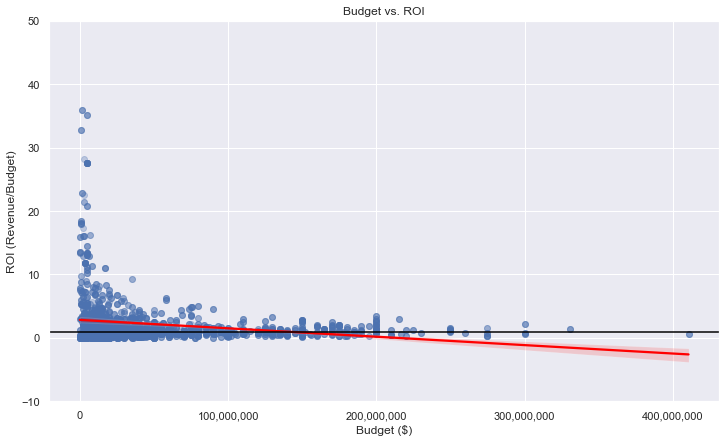

In [30]:
# Test for domestic roi and budget
x = merge_df['production_budget']
y = merge_df['roi_domestic']

# call the fuction
hypothesis_testing(x, y)

Correlation: -0.0760, p-value: 0.0000
Reject null hypothesis
There is a significant relationship between production budget and revenue


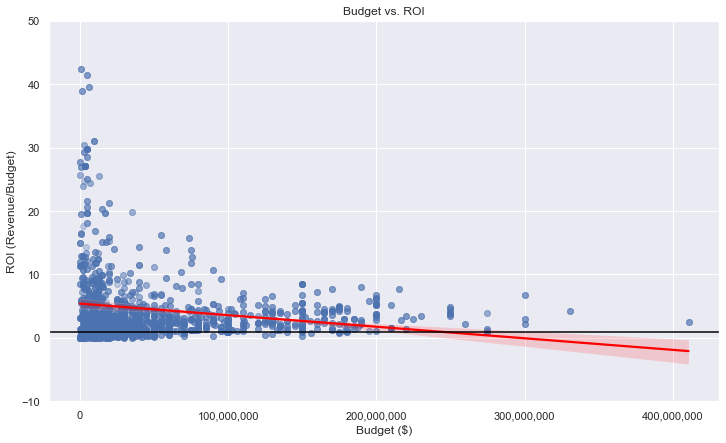

In [31]:
# Test for domestic roi and budget
x = merge_df['production_budget']
y = merge_df['roi_worldwide']

# call the fuction
hypothesis_testing(x, y)

From the two illustrations, it is evident that the relationship between budget and revenue is significant and negatively correlated.A negative correlation between budget and Return on Investment means that as a film's budget increases, its ROI tends to decrease on average. This means that the more the higher the budget, the less profitable the movie.

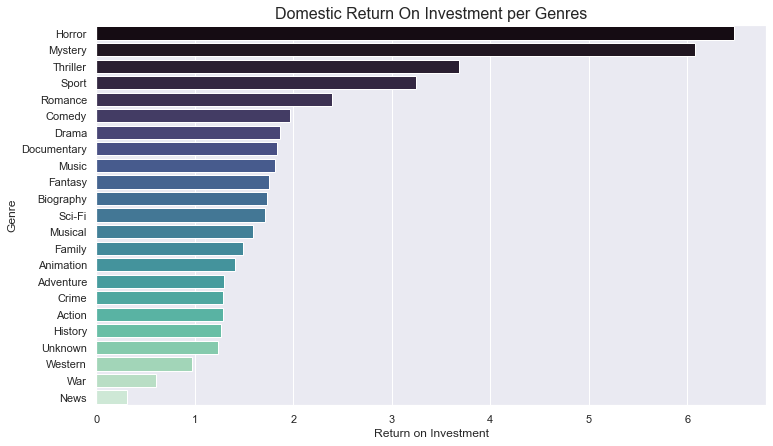

In [42]:
# Domestic ROI by genre
genre_by_roi = (merge_df.groupby('genres')['roi_domestic']
                .mean()
                .sort_values(ascending=False)
                .reset_index())

# Plot 
plt.figure(figsize=(12, 7))
sns.barplot(
    data=genre_by_roi,
    y='genres',
    x='roi_domestic',
    hue='genres',
    palette='mako'
    )

# Add title and axis labels
plt.title('Domestic Return On Investment per Genres', 
          fontsize=16)
plt.xlabel('Return on Investment', 
           fontsize=12)
plt.ylabel('Genre', 
           fontsize=12)

plt.savefig('images/genre-Roi', bbox_inches='tight', dpi=300)

Text(0, 0.5, 'Genre')

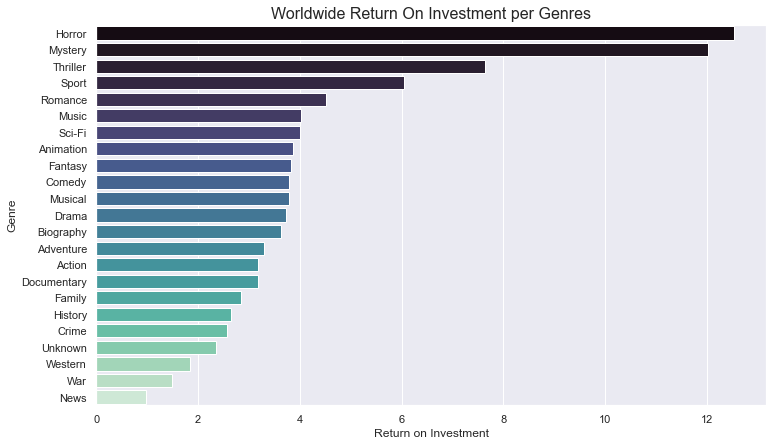

In [33]:
# Worldwide ROI by genre
genre_by_roi2 = (merge_df.groupby('genres')['roi_worldwide']
                 .mean()
                 .sort_values(ascending=False)
                 .reset_index())

# Plot 
plt.figure(figsize=(12, 7))
sns.barplot(
    data=genre_by_roi2,
    y='genres',
    x='roi_worldwide',
    hue='genres',
    palette='mako'
    )

# Add title and axis labels
plt.title('Worldwide Return On Investment per Genres', 
          fontsize=16)
plt.xlabel('Return on Investment', 
           fontsize=12)
plt.ylabel('Genre', 
           fontsize=12)


From the above visualizations we can conclude that the genre with the lowest risk is horror with a highest return rate

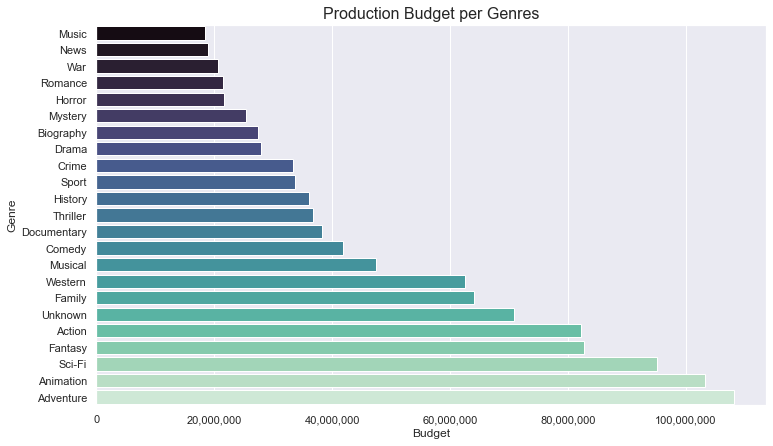

In [43]:
# plot the production budget per genre
budget =  (merge_df.groupby('genres')['production_budget']
           .mean()
           .sort_values()
           .reset_index())

# Plot 
plt.figure(figsize=(12, 7))
sns.barplot(
    data=budget,
    y='genres',
    x='production_budget',
    hue='genres',
    palette='mako'
    )

# Format the x-axis to output full values
plt.gca().xaxis.set_major_formatter(
    ticker.StrMethodFormatter("{x:,.0f}")
    )

# Add title and axis labels
plt.title('Production Budget per Genres', 
          fontsize=16)
plt.xlabel('Budget', 
           fontsize=12)
plt.ylabel('Genre', 
           fontsize=12)

plt.savefig('images/genre-budget', bbox_inches='tight', dpi=300)

From the above visualization the budget, the best performing genre in terms of horror has a budget of between $0 and $30 million $. Hence the best budget to start with should not exceed $30 million

### Objective 3: Analyze the rating reviews

Text(0, 0.5, 'Genre')

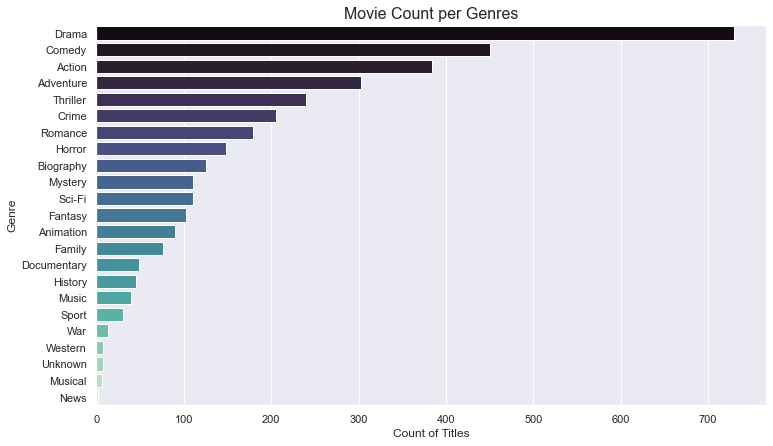

In [35]:
# Count of movie titles per genre
movies_per_genre = (merge_df['genres']
                    .value_counts()
                    .reset_index())
  

# Plot 
plt.figure(figsize=(12, 7))
sns.barplot(
    data=movies_per_genre,
    y='genres',
    x='count',
    hue='genres',
    palette='mako'
    )

# Add title and axis labels
plt.title('Movie Count per Genres', 
          fontsize=16)
plt.xlabel('Count of Titles', 
           fontsize=12)
plt.ylabel('Genre', 
           fontsize=12)


From the above illustrations, we can see that most titles fall under drama. We should always. From this we can conclude that most of the audience rate drama highly thus most studios keep creating drama films.

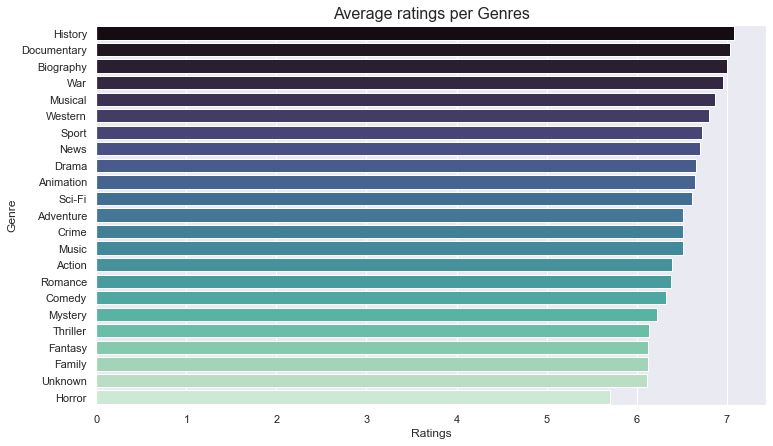

In [44]:
# Mean average_rating per genre
genre_ratings = (merge_df.groupby('genres')['average_rating']
                 .mean()
                 .sort_values(ascending=False)
                 .reset_index()
                 )

# Plot 
plt.figure(figsize=(12, 7))
sns.barplot(
    data=genre_ratings,
    y='genres',
    x='average_rating',
    hue='genres',
    palette='mako'
    )

# Add title and axis labels
plt.title('Average ratings per Genres', 
          fontsize=16)
plt.xlabel('Ratings', 
           fontsize=12)
plt.ylabel('Genre', 
           fontsize=12)

plt.savefig('images/genre-ratings', bbox_inches='tight', dpi=300)

From the above illustrations, its evident that the highest rated genre films are history and least are horror. However, caution must be exercised since the disparity in ratings often stems from differences in audience expectations, genre conventions, systemic and cusltural biases, not inherent superiority.

Text(0, 0.5, 'Genre')

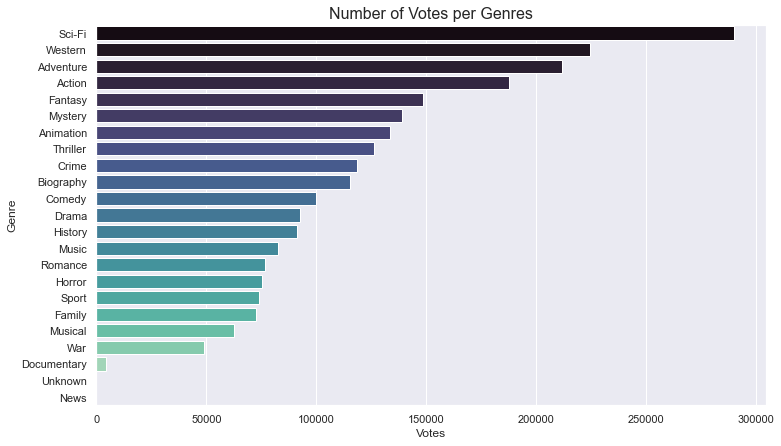

In [39]:
# Average votes per genre
genre_votes = (merge_df.groupby('genres')['num_votes']
               .mean()
               .sort_values(ascending=False)
               .reset_index())
genre_votes

# Plot 
plt.figure(figsize=(12, 7))
sns.barplot(
    data=genre_votes,
    y='genres',
    x='num_votes',
    hue='genres',
    palette='mako'
    )

# Add title and axis labels
plt.title('Number of Votes per Genres', 
          fontsize=16)
plt.xlabel('Votes', 
           fontsize=12)
plt.ylabel('Genre', 
           fontsize=12)

From the above illustrations, it can be seen that the highest rated film is Sci-Fi. This may genuinely repressent mainstream appeal, broad audience reach, or frequent pairing with popular genres.

In [40]:
# save the merged dataframe as csv
merge_df.to_csv('data/movie.csv', index=False)

### Objective 4 : Actionable Recommendations

1. **Prioritize films that have low risk and high Return on investment** - Launch the studio with blended high performing genres, that is, horror, mystery, thriller combo based on our analysis. Avoid genres that are over-saturated like action and high budget production films. Focus on genres with proven profitability and lower production costs based on historical data.

2. **Enter into strategic partnerships and productions** - Mitigate industry risks by collaborating with already established industry players. Focus on players that produce original contect.

3. **Diversify content creation** - Build multiple revenue avenues by engaging in different genres of content creation and involve tapping the global market by collaborating and creating content with international productions as studio reputation is built.

4. **Leverage data-driven insights in production decisions** - Partner with streaming platforms like Netflix to access viewership data on trending themes then use analytics to identify trends and gaps in the market

4. **Modeling** - Build a model that takes multiple variables based on the data and make data-driven decisions based on future predictions of the model.

5. **Budgetary control** - Launch the studio by setting a production limit of $ 30 million for all the movies to be produced.

# **Conclusion**

Based on the analysis of genre performance over time, audience reviews, and financial performance, the following conclusions emerged as guidelines for the new studio:

1. The general performance trend of the film industry over the years is fairly inconsistent but from our analysis we can infer that the average gross revenue domestically ranges between $40 million to $ 80 million and average gross revenue worldwide ranges between $100 to $200 million.

2. Production budget and Return On investment(ROI) are negatively correlated. The more the budget of the movie increases the more unprofitable the movie becomes. Any ROI less than 1 is considered unprofitable.

3. Ratings of audience are usually subjective. They depend on several factors and do not necessarily communicate superiority of the movies. As the saying goes "one man's meat is another man's poison".